In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
train_df = pd.read_csv("Dataset/train.csv")
test_df = pd.read_csv("Dataset/test.csv")

In [70]:
train_df.head()

Id         0         1         2         3         4         5         6  \
0  120  0.147298 -0.142030  0.091737 -0.151707  0.060124  0.186191 -0.021298   
1  121  0.115710  0.105061  0.038446  0.166711 -0.113913  0.004528 -0.006954   
2  122 -0.548826 -0.466551 -0.650890 -0.553450 -0.449101 -0.496902 -0.464860   
3  123  0.192618  0.291155 -0.042980  0.146483  0.015390  0.019394 -0.005577   
4  124  0.075706  0.069045 -0.019818  0.068801 -0.226501  0.011658  0.087905   

          7         8  ...        91        92        93        94        95  \
0 -0.025636  0.061044  ... -0.218118  0.011316  0.079464 -0.010833 -0.053485   
1 -0.140054  0.154231  ...  0.021526  0.069009 -0.060343  0.094007  0.049558   
2 -0.394458 -0.271801  ...  0.057272  0.088062 -0.069730  0.168498  0.109672   
3 -0.048682  0.025772  ...  0.140831  0.257332  0.262786  0.351659  0.213291   
4 -0.080787 -0.080369  ...  0.434803  0.322841  0.297772  0.461421  0.406143   

         96        97        98        99  Category  
0  0.046450 -0.008333  0.168574  0.123273         0  
1  0.112370  0.020398  0.039687  0.217384         0  
2  0.202808 -0.019942  0.058902  0.053936         0  
3  0.251077  0.190920  0.251743  0.337730         1  
4  0.562082  0.554588  0.471489  0.384229         1  

[5 rows x 102 columns]

Each row is a country. Want to visualise the dataset per country, just to get a look at what we're dealing with. So grab sub-set of the datafame without the first and last column.

In [46]:
train_time_series_df = train_df.iloc[:,1:-1]

In [63]:
train_time_series_df.iloc[1,:]

0     0.115710
1     0.105061
2     0.038446
3     0.166711
4    -0.113913
        ...   
95    0.049558
96    0.112370
97    0.020398
98    0.039687
99    0.217384
Name: 1, Length: 100, dtype: float64

Print the category value - if the non-seasonal component is increasing; value=0 if the non-seasonal component is not increasing.

In [111]:
int(train_df.iloc[0,-1:]['Category'])

0

Can now plot the time series per country:

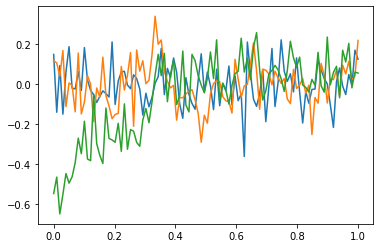

In [112]:
x = np.linspace(0,1,train_time_series_df.shape[1])

plt.plot(x, train_time_series_df.iloc[0,:])
plt.plot(x, train_time_series_df.iloc[1,:])
plt.plot(x, train_time_series_df.iloc[2,:])

Let's look at all the data at once, get to grips with the problem

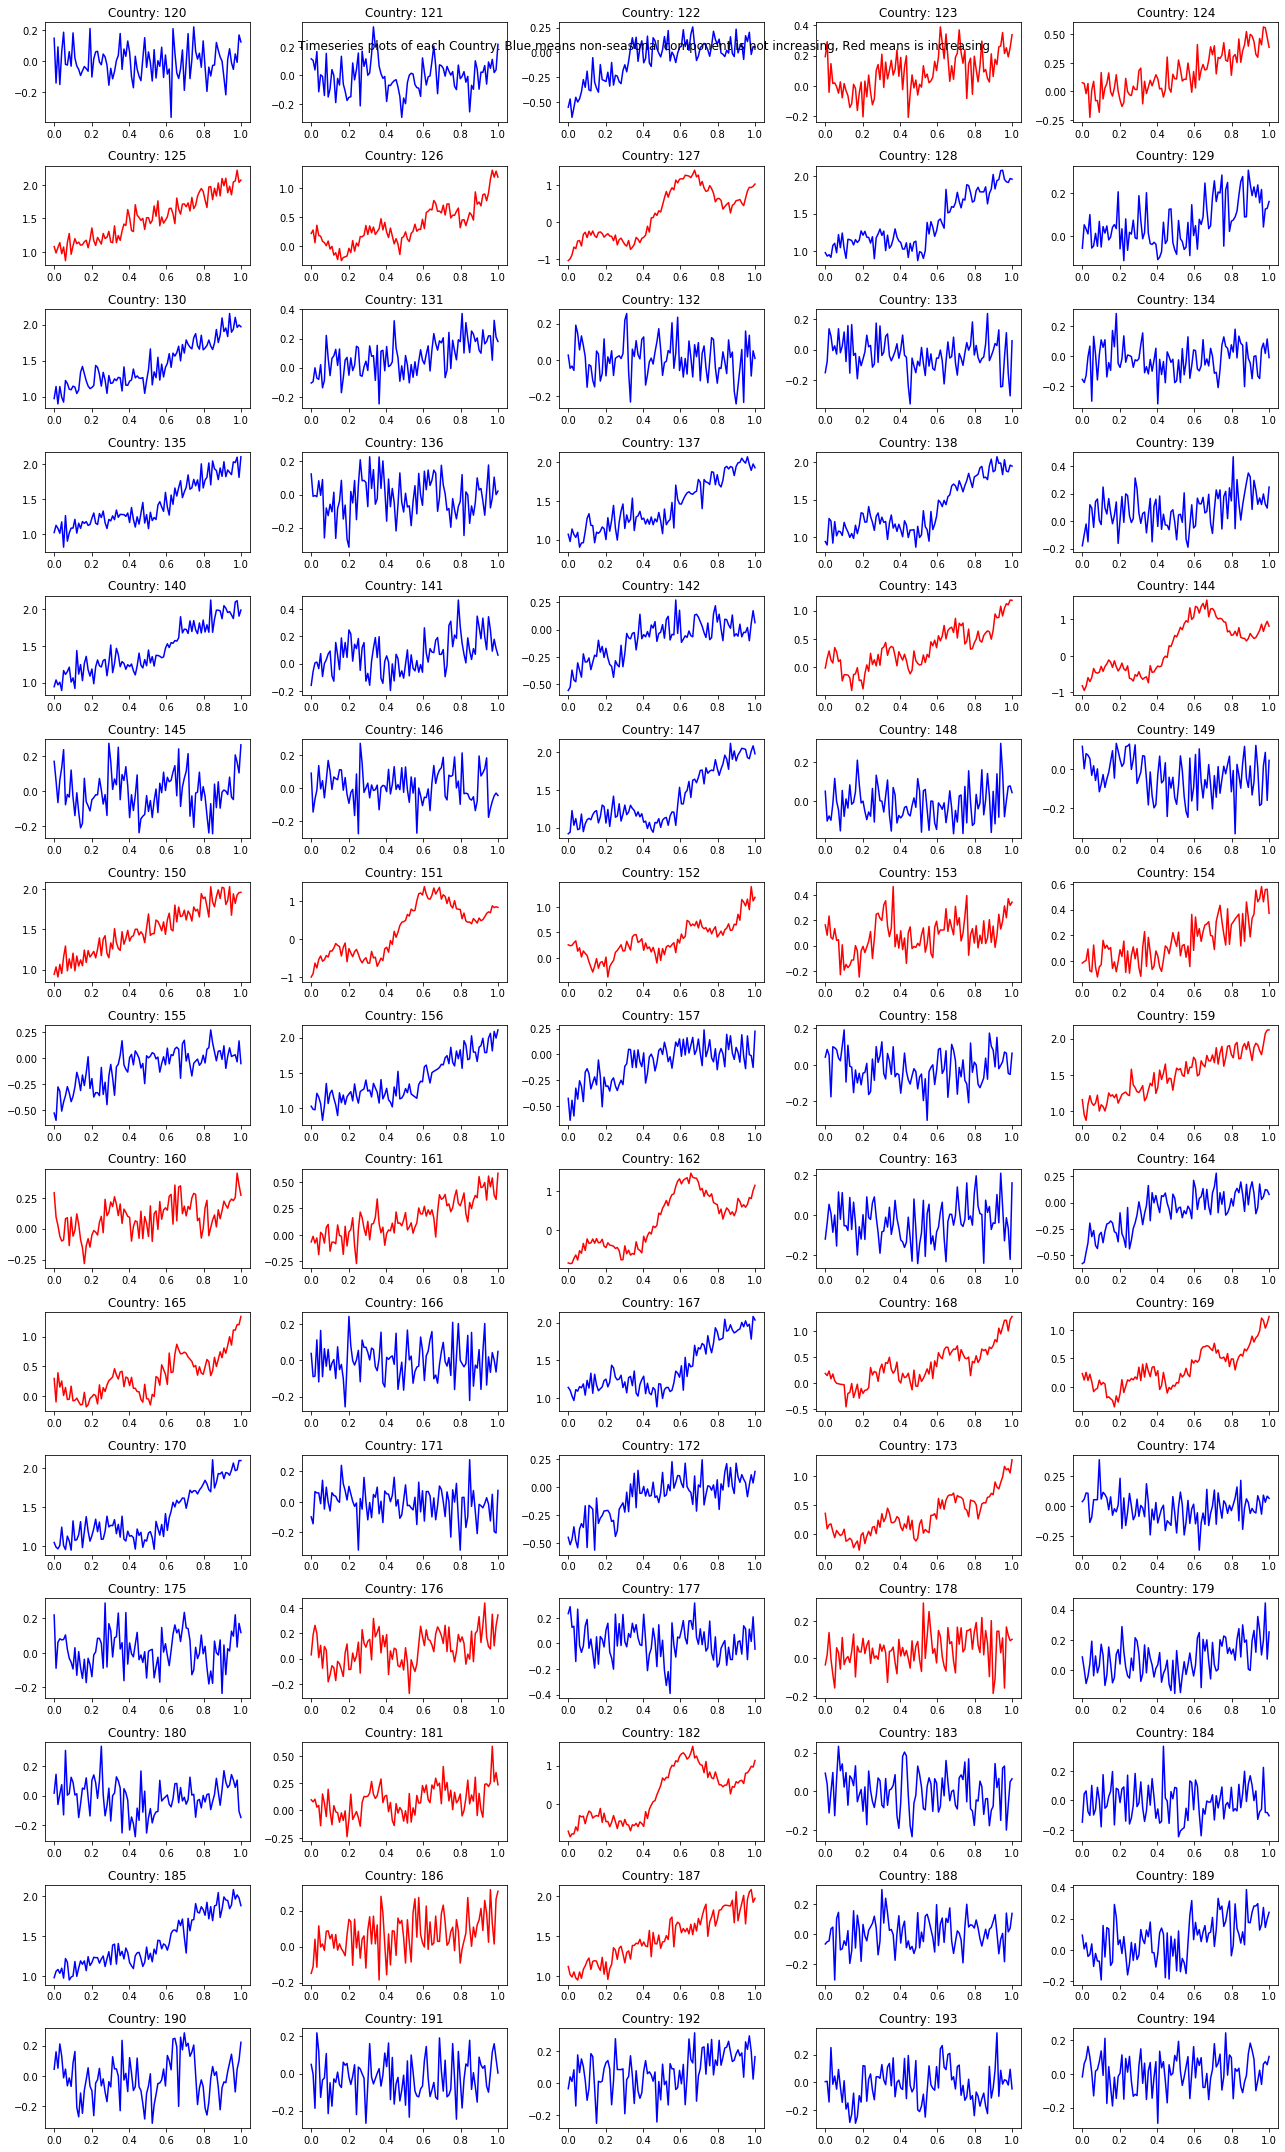

In [110]:
plot_num_cols = 5
fig, axs = plt.subplots(nrows=15, ncols=plot_num_cols, figsize=(18, 30))
axs = axs.flat # so only 1 for loop

num_rows = train_time_series_df.shape[0]
rows = range(0, num_rows)


for ax, i in zip(axs, rows):
    plt_col = i % plot_num_cols
    plt_row = i - plt_col
    ax.set_title(f'Country: {i + 120}')
    c = 'blue' if (train_df.iloc[i,-1:]['Category'] < 0.5) else 'red'
    
    ax.plot(x, train_time_series_df.iloc[i,:], color=c)

plt.tight_layout()
plt.suptitle("Timeseries plots of each Country. Blue means non-seasonal component is not increasing, Red means is increasing")
plt.show()